#### EUCLIDEAN DISTANCE

In [10]:
import pandas as pd

# Load the data (assuming each sheet has the same format)
yolopose_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_yolopose.xlsx")
mediapipe_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_mediapipe.xlsx")
movenet_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_movenet.xlsx")
keypoint_rcnn_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_keypoint_rcnn.xlsx")
hybrid_df=pd.read_excel(r"c:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\GROK\checkdataset_keypoint_coordinates_.xlsx")
# Assuming ground truth is in all sheets, extract one of them
groundtruth_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_gt.xlsx")  # Example: Extract from yolopose.xlsx


In [11]:
print(yolopose_df.columns)
print(groundtruth_df.columns)


Index(['Images', 'left_shoulder_x', 'left_shoulder_y', 'left_elbow_x',
       'left_elbow_y', 'left_wrist_x', 'left_wrist_y', 'left_hip_x',
       'left_hip_y', 'left_knee_x', 'left_knee_y', 'left_ankle_x',
       'left_ankle_y'],
      dtype='object')
Index(['Images', 'left_shoulder_x', 'left_shoulder_y', 'left_elbow_x',
       'left_elbow_y', 'left_wrist_x', 'left_wrist_y', 'left_hip_x',
       'left_hip_y', 'left_knee_x', 'left_knee_y', 'left_ankle_x',
       'left_ankle_y'],
      dtype='object')


In [12]:
import numpy as np

def compute_errors(pred_df, gt_df, keypoints):
    errors = {}
    for keypoint in keypoints:
        x_pred, y_pred = pred_df[f"{keypoint}_x"], pred_df[f"{keypoint}_y"]
        x_gt, y_gt = gt_df[f"{keypoint}_x"], gt_df[f"{keypoint}_y"]

        error = np.sqrt((x_pred - x_gt)**2 + (y_pred - y_gt)**2)
        errors[keypoint] = error.mean()  # Average error per keypoint

    return errors

keypoints = ["left_shoulder", "left_elbow", "left_wrist", "left_hip", "left_knee", "left_ankle"]

yolopose_errors = compute_errors(yolopose_df, groundtruth_df, keypoints)
mediapipe_errors = compute_errors(mediapipe_df, groundtruth_df, keypoints)
movenet_errors = compute_errors(movenet_df, groundtruth_df, keypoints)
keypoint_rcnn_errors = compute_errors(keypoint_rcnn_df, groundtruth_df, keypoints)
hybrid_errors=compute_errors(hybrid_df,groundtruth_df, keypoints)

In [13]:
error_df = pd.DataFrame({
    "Keypoint": keypoints,
    #"YOLOPose": [yolopose_errors[k] for k in keypoints],
    "MediaPipe": [mediapipe_errors[k] for k in keypoints],
    #"Movenet": [movenet_errors[k] for k in keypoints],
    "Keypoint R-CNN": [keypoint_rcnn_errors[k] for k in keypoints],
    "Hybrid": [hybrid_errors[k] for k in keypoints] 

})

print(error_df)


        Keypoint  MediaPipe  Keypoint R-CNN    Hybrid
0  left_shoulder   0.010951        0.005810  0.005817
1     left_elbow   0.007473        0.008452  0.004975
2     left_wrist   0.007355        0.005922  0.005922
3       left_hip   0.019905        0.012958  0.012958
4      left_knee   0.009718        0.009618  0.009664
5     left_ankle   0.011447        0.005865  0.005865


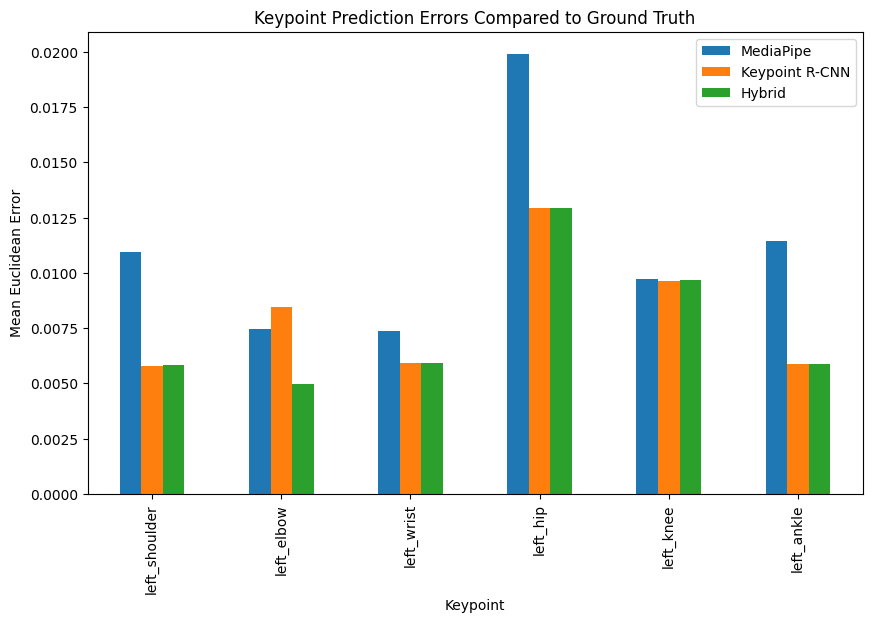

In [14]:
import matplotlib.pyplot as plt

error_df.set_index("Keypoint").plot(kind="bar", figsize=(10, 6))
plt.ylabel("Mean Euclidean Error")
plt.title("Keypoint Prediction Errors Compared to Ground Truth")
plt.show()


In [7]:
overall_errors = {
    "YOLOPose": np.mean(list(yolopose_errors.values())),
    "MediaPipe": np.mean(list(mediapipe_errors.values())),
    "Movenet": np.mean(list(movenet_errors.values())),
    "Keypoint R-CNN": np.mean(list(keypoint_rcnn_errors.values())),
    #"Hybrid":np.mean(list(hybrid_errors.values()))
}
# Convert errors to percentage
overall_errors_percentage = {key: value * 100 for key, value in overall_errors.items()}

print(overall_errors)
print("Error in percentage:",overall_errors_percentage)


{'YOLOPose': 0.014189125058008836, 'MediaPipe': 0.011141448212841428, 'Movenet': 0.016699218722547548, 'Keypoint R-CNN': 0.008104187891991398}
Error in percentage: {'YOLOPose': 1.4189125058008836, 'MediaPipe': 1.114144821284143, 'Movenet': 1.6699218722547549, 'Keypoint R-CNN': 0.8104187891991398}


#### 